# 2 - HMM 

## 2.4 - Casino and dice

### 2.4.1 - dataset

In [4]:
import numpy as np

np.random.seed = 13
data = np.load('rolls.npy')

### 2.4.2 - task 1

In [5]:
# split data into training and validation sets with first 50% of data as training
train_data = data[:int(len(data)/2)]
val_data = data[int(len(data)/2):]

In [6]:
def random_emission_prob():
    random_numbers = np.random.dirichlet(np.ones(6))
    return random_numbers

In [7]:
# lists of loaded die emission

emission_list = []
for i in range(10):
    emission_list.append(random_emission_prob())
emission_list = np.array(emission_list)

#### HMM training

In [8]:
%pip install hmmlearn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 KB 1.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [26]:

from hmmlearn import hmm

max_score = -1e9
bestmodel = None
for loaded_state_emission in emission_list:
    model = hmm.CategoricalHMM(n_components=2, init_params='')  # Two hidden states (Fair and Loaded)
    model.startprob_ = np.array([1,0])
    fair_emission_prob = np.array([1/6,1/6,1/6,1/6,1/6,1/6])
    stacked_array = np.hstack((fair_emission_prob, loaded_state_emission))
    emission_matrix = stacked_array.reshape(2, -1)
    model.emissionprob_ = emission_matrix
    
    model.fit(train_data)
    score = model.score(val_data)
    if score > max_score:
        bestmodel = model
        max_score = score


#### Best model

In [27]:
# best model
print("Best Emission Probablities: ",bestmodel.emissionprob_)
print("Best Transition Probablities: ",bestmodel.transmat_)
print("Best Start Probablities: ",bestmodel.startprob_)

Best Emission Probablities:  [[0.16815802 0.16056025 0.17233902 0.164934   0.16850944 0.16549927]
 [0.10059186 0.10867193 0.09621229 0.10082708 0.10445754 0.4892393 ]]
Best Transition Probablities:  [[0.83234814 0.16765186]
 [0.20790483 0.79209517]]
Best Start Probablities:  [1. 0.]


#### Most likely sequence

In [46]:
# best sequence for validation data
best_sequence = bestmodel.predict(val_data)
print("Best Sequence (0-FAIR, 1-LOADED) : ",best_sequence)

Best Sequence (0-FAIR, 1-LOADED) :  [0 0 0 ... 1 1 1]


#### Plot the generated states

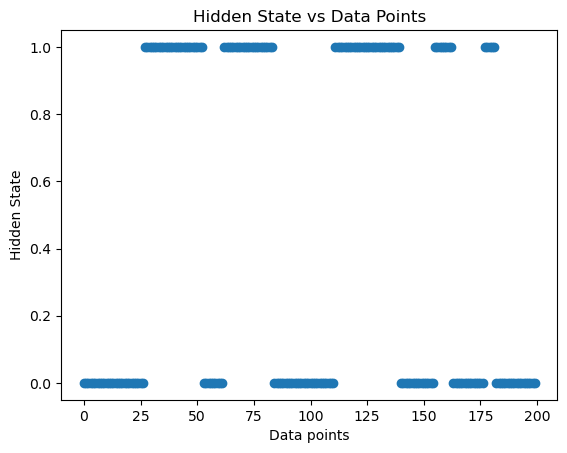

In [50]:
import matplotlib.pyplot as plt
# only for first 200 data points
plt.scatter( range(200),best_sequence[:200])
plt.xlabel("Data points")
plt.ylabel("Hidden State")
plt.title("Hidden State vs Data Points")
plt.show()


Deciphering the optimal sequence of switching between a fair and loaded die via Hidden Markov Models (HMMs) is linked to solving the decoding problem in HMMs.

The decoding problem entails identifying the most probable sequence of concealed states based on the observed data sequence. Here, hidden states denote the fair or loaded die conditions, while observations refer to the actual dice rolls.

The Viterbi algorithm, employed in the given solution, is a dynamic programming approach commonly utilized to address the decoding problem in HMMs. Its efficiency lies in determining the most likely sequence of hidden states that best corresponds to the observed data, taking into account the model parameters.

To summarize, identifying the most probable sequence of transitions between a fair and loaded die corresponds to the decoding problem within the framework of Hidden Markov Models.

### 2.4.3 - task 2

#### 1. How often casino is switching out the fair die for the loaded one and vice versa

In [38]:
fair_to_loaded = 0
loaded_to_fair = 0
print(len(best_sequence))
for i in range(len(best_sequence)-1):
    if best_sequence[i] == 0 and best_sequence[i+1] == 1:
        fair_to_loaded += 1
    elif best_sequence[i] == 1 and best_sequence[i+1] == 0:
        loaded_to_fair += 1

print("Number of times fair to loaded: ",fair_to_loaded)
print("Number of times loaded to fair: ",loaded_to_fair)

# in terms of transition probabilities
print("Transition Probablity from fair to loaded: \n",bestmodel.transmat_)

50000
Number of times fair to loaded:  1110
Number of times loaded to fair:  1109
Transition Probablity from fair to loaded: 
 [[0.83234814 0.16765186]
 [0.20790483 0.79209517]]


When we train a HMM using a set of dice rolls and try out different probabilities for the loaded die, it relates to what's called the parameter estimation problem in HMMs.

In HMMs, this problem is about figuring out the settings that define the model, like how likely it is to start with a fair or loaded die, the chances of switching between them, and the probabilities of each die roll given the hidden state.

Specifically in this task:

Initial state probabilities: These show the chances of starting with either the fair or loaded die.

Transition probabilities: They indicate the likelihood of changing from one die to the other as we move through the rolls.

Emission probabilities: These relate to the dice rolls themselves and tell us the chances of getting a specific roll considering the type of die used.
The main goal here is to play around with the emission probabilities for the loaded die. This action is a part of figuring out the best settings for the model based on the observed data.

To sum it up, tweaking an HMM by trying different emission probabilities is a way of dealing with the parameter estimation problem in Hidden Markov Models.

### 2.4.4 - task 3

#### Bias of the loaded die

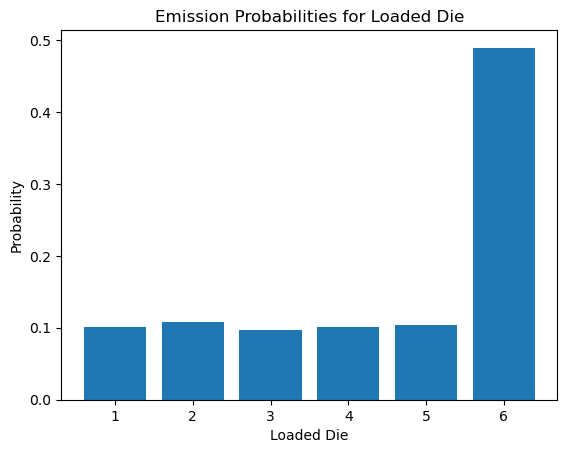

   Probability
1     0.100592
2     0.108672
3     0.096212
4     0.100827
5     0.104458
6     0.489239


In [58]:
import matplotlib.pyplot as plt

# plot the emmision probabilities for loaded die
plt.bar(np.arange(1,7),bestmodel.emissionprob_[1])
plt.xlabel("Loaded Die")
plt.ylabel("Probability")
plt.title("Emission Probabilities for Loaded Die")
plt.show()

# tabulate the emission probabilities for loaded die
import pandas as pd
df = pd.DataFrame(bestmodel.emissionprob_[1])
df.columns = ["Probability"]
df.index = ["1","2","3","4","5","6"]
print(df)



We can see that the loaded die is biased towards rolling a 6.

This task corresponds to the "Learning" problem in Hidden Markov models.
This is because we are being asked to find how biased the loaded die is, which corresponds to the Learning question in HMMs.

## 2.5 - Cricket

We're using a mathematical function called the Dirichlet function to make educated guesses about how players like Virat and Rohit might perform during a cricket game. This function helps us create a probability distribution that matches what we roughly know about their playing style.

For the likelihood of changing the game situation after each ball, we're using the Dirichlet function with specific settings. For the first row of the `transition matrix`, we're using `[0.7, 0.3]` to represent a higher chance of certain changes, and for the second row, it's `[0.3, 0.7]` to reflect a different chance.

Regarding how `Virat` plays, we're guessing that he's more inclined to take singles and doubles. So, for different types of shots like scoring `0, 1, 2, 3, 4, or 6 runs`, we've set specific values `[2, 3, 3, 1, 1, 0.5]` based on our assumption that he tends to focus more on less risky shots.

Now, talking about `Rohit's` style, we're assuming that he might take more chances, preferring shots that involve more risk, like fours and sixes. So, for similar types of runs, we've set different values `[2, 1, 0.5, 0.25, 3, 3]`, giving more importance to risky shots and less to shots where running between the wickets is needed.

Since we're not sure who `starts the game`, we've chosen a neutral probability represented by `[0.5, 0.5]`.

In [59]:
import numpy as np
# Load the data
runs_data = np.load('runs.npy')
# replace 6 with 5
runs_data[runs_data == 6] = 5

#### Get best papameters

In [82]:
from hmmlearn import hmm

n_states = 2 # Virat and Rohit
bestmodel = None
max_score = -np.inf
for i in range(10):
    model = hmm.CategoricalHMM(n_components=n_states, init_params='')

    model.startprob_ = np.random.dirichlet([0.5, 0.5])  # Initial start probabilities for states
    model.transmat_ = np.array([np.random.dirichlet([7, 3]),np.random.dirichlet([3, 7])])  # Initial transition probabilities
    model.emissionprob_ = np.array([np.random.dirichlet([2, 3, 3, 1, 1, 0.5]),np.random.dirichlet([2, 1, 0.5, 0.5, 3, 3])])  # Initial emission probabilities

    # Fit the model to the data
    model.fit(runs_data)  # Assuming runs_data is a 1D array

    score = model.score(runs_data)
    if score > max_score:
        bestmodel = model
        max_score = score


In [83]:
print("Optimized start probability is: \n", bestmodel.startprob_)
print("Optimized transition probability is: \n", bestmodel.transmat_)
# first row is Virat and second row is Rohit
print("Optimized emission probability is: \n", bestmodel.emissionprob_)

Optimized start probability is: 
 [9.99989355e-01 1.06453287e-05]
Optimized transition probability is: 
 [[0.48639445 0.51360555]
 [0.34998833 0.65001167]]
Optimized emission probability is: 
 [[0.14872436 0.37772132 0.39233683 0.04783105 0.01847992 0.01490652]
 [0.10933631 0.07955556 0.030248   0.04833934 0.41411453 0.31840627]]


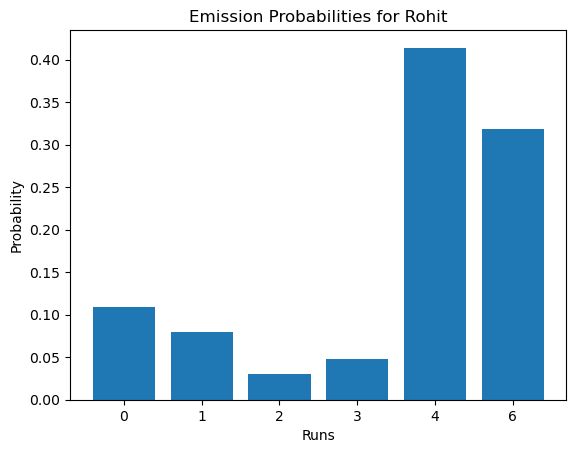

In [84]:
# emission probabilities for Rohit
import matplotlib.pyplot as plt
probabilities = bestmodel.emissionprob_[1]
runs = ["0", "1", "2", "3", "4", "6"]
plt.bar(runs, probabilities)
plt.xlabel("Runs")
plt.ylabel("Probability")
plt.title("Emission Probabilities for Rohit")
plt.show()


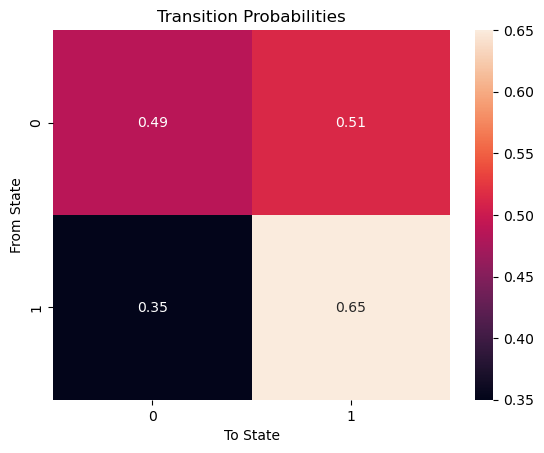

In [89]:
# plot the transition probabilities
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(bestmodel.transmat_, annot=True)
plt.xlabel("To State")
plt.ylabel("From State")
plt.title("Transition Probabilities")
plt.show()


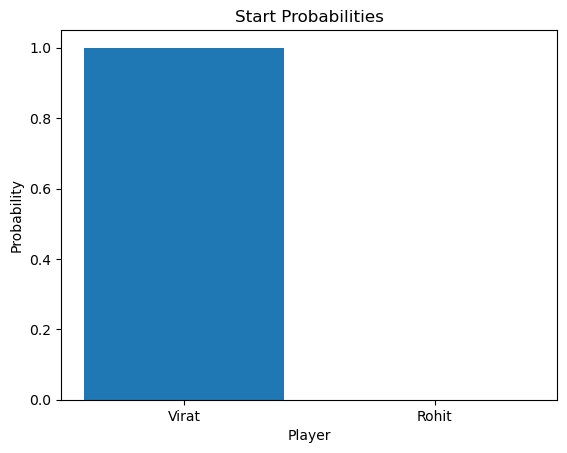

In [94]:
# plot the start probabilities 
import matplotlib.pyplot as plt
plt.bar(["Virat", "Rohit"], bestmodel.startprob_)
plt.xlabel("Player")
plt.ylabel("Probability")
plt.title("Start Probabilities")
plt.show()



#### 2. Player who played first and last ball

In [87]:
best_sequence = bestmodel.predict(runs_data)

In [88]:
players = {
    0 : 'Virat',
    1 : 'Rohit'
}
print("First ball was played by: ", players[best_sequence[0]])
print("Last ball was played by: ", players[best_sequence[-1]])

First ball was played by:  Virat
Last ball was played by:  Rohit
